# Simulation of Complex Systems - Chapter 6
Artur Gasparyan

## Exercise 1

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import constants

In [116]:
rng = np.random.default_rng()
n_steps = 1000
time_step = 0.01

absolute_temperature = 20
friction_coef = 0.3
mass = 0.3
optical_stiffness = 2

relaxation_time = mass/friction_coef
relaxation_lag = time_step / relaxation_time

fluctuation_size = math.sqrt(2*constants.Boltzmann*absolute_temperature*friction_coef)
fluctations = rng.normal(size=(n_steps, 2))/math.sqrt(2)   # Random 2D steps normalized to 1

x_overdamped = np.zeros((n_steps, 2))
x_inertial = np.zeros((n_steps, 2))
x_trapped = np.zeros((n_steps, 2))

for i in range(1, n_steps):
    x_overdamped[i] = x_overdamped[i-1] + fluctations[i]*time_step/(friction_coef*friction_coef)

for i in range(2, n_steps):
    x_inertial[i] = (
        x_inertial[i-1]*(2+relaxation_lag)/(1+relaxation_lag) -
        x_inertial[i-2]/(1+relaxation_lag) + 
        fluctations[i]/((1+relaxation_lag)*mass) * time_step**(3/2)
    )
    
for i in range(1, n_steps):
    x_trapped[i] = (
        x_trapped[i-1]*(1 - optical_stiffness/friction_coef*time_step) +
        fluctations[i]*time_step/(friction_coef*friction_coef)
    )

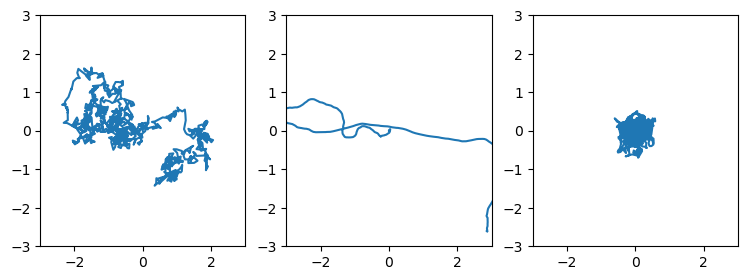

In [117]:
fig, axes = plt.subplots(1, 3, figsize=(9, 3))

for x, ax in zip([x_overdamped, x_inertial, x_trapped], axes):
    ax.set_xlim(-3, 3)
    ax.set_ylim(-3, 3)
    ax.plot(x[:, 0], x[:, 1])
